# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ImportError: DLL load failed while importing _ufuncs: The specified procedure could not be found.

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

NameError: name 'citipy' is not defined

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        pprint(city_weather)
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]# YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]# YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]# YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] #YOUR CODE HERE
        city_country = city_weather["sys"]["country"]# YOUR CODE HERE
        city_date = city_weather["dt"]# YOUR CODE HERE
        

        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
   
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [11]:
# Display sample data
city_data_df.head()

""


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

""
City_ID


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

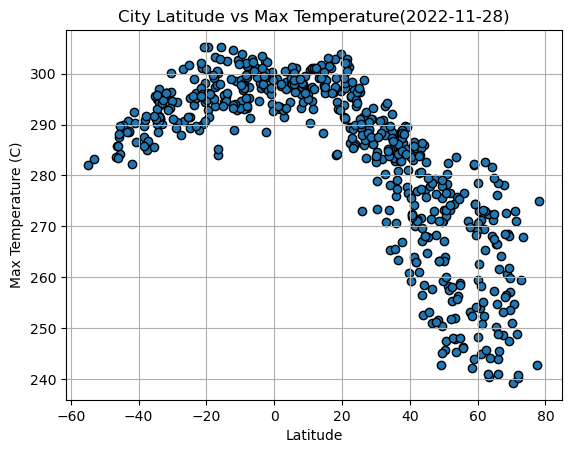

In [4]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

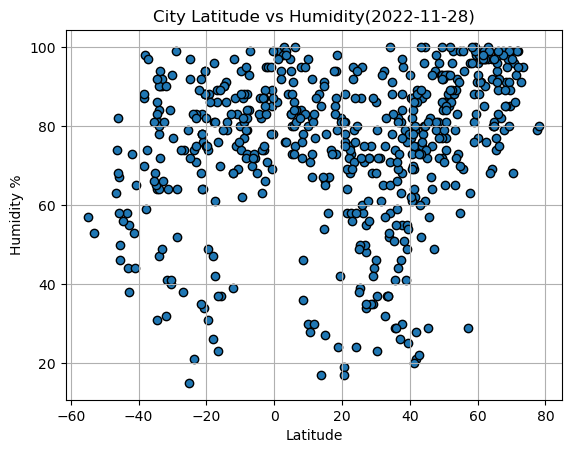

In [10]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

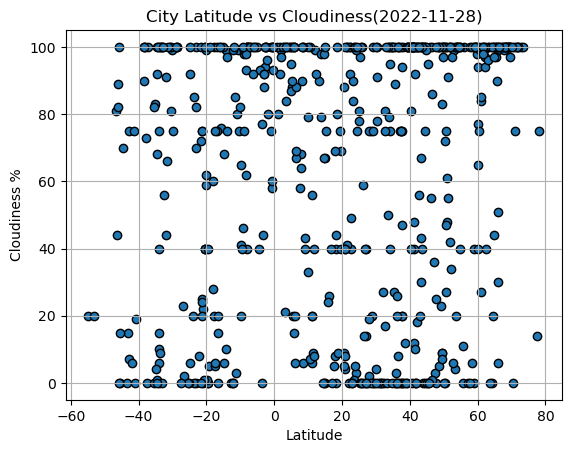

In [11]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

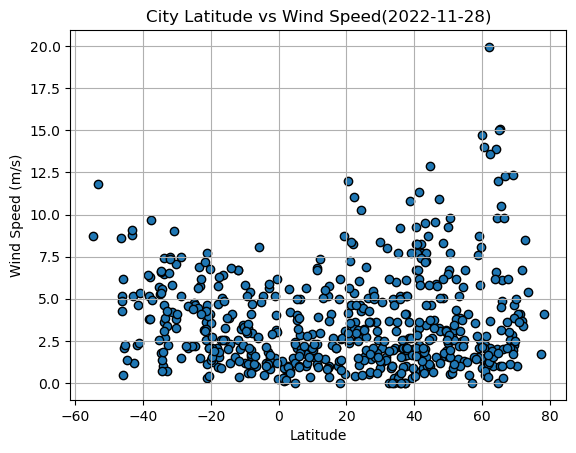

In [12]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed(2022-11-28)")

plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kaohsiung,22.6163,120.3133,295.39,73,40,3.60,TW,1669854543
4,broome,42.2506,-75.8330,276.87,74,100,7.72,US,1669854544
6,leh,34.1667,77.5833,265.32,58,95,0.31,IN,1669854336
8,aykhal,66.0000,111.5000,241.11,98,99,6.14,RU,1669854546
9,paamiut,61.9940,-49.6678,269.46,85,100,19.95,GL,1669854547


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,301.24,83,75,4.63,TO,1669854542
1,new norfolk,-42.7826,147.0587,288.55,38,7,1.20,AU,1669854543
3,puerto ayora,-0.7393,-90.3518,294.01,89,58,3.13,EC,1669854245
5,sambava,-14.2667,50.1667,295.35,91,10,2.30,MG,1669854545
7,rikitea,-23.1203,-134.9692,296.00,71,82,5.76,PF,1669854364


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 240), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.43221572820006865


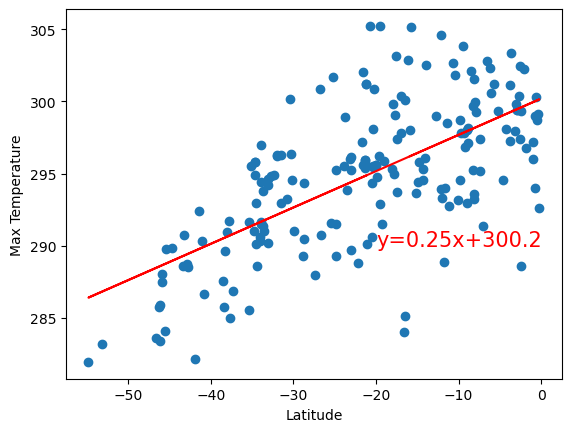

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 290), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue**2}")
plt.show()

In [ ]:
# When Latitude increases Max Temperature drops in Northern Hemisphere, while in Southern Hemisphere when Latitude is closer to 0 Max Temperature increases

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.06575862185753165


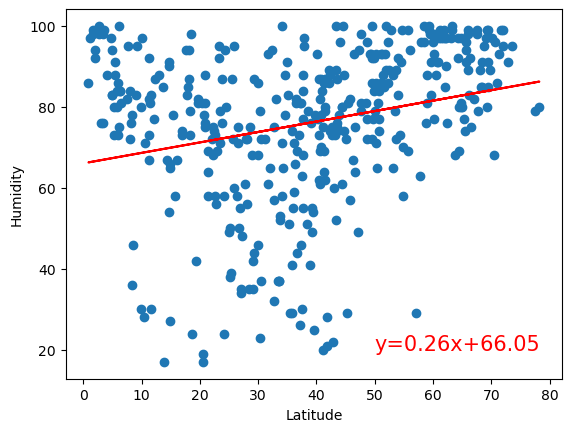

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.09108018058912117


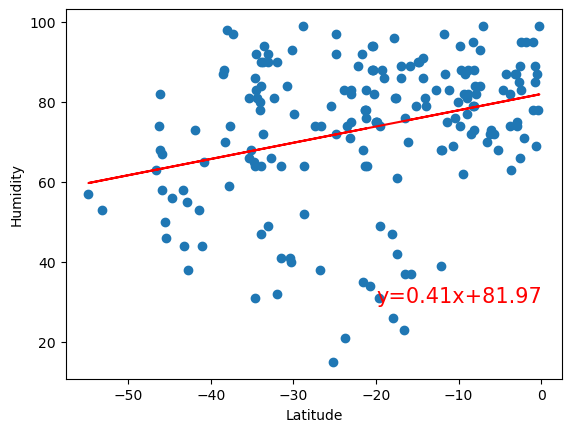

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.028317535541738884


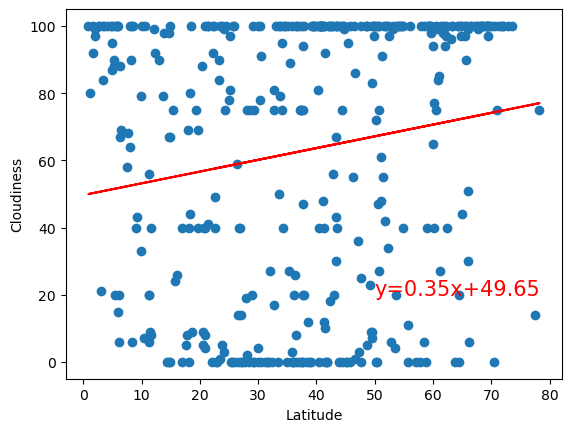

In [29]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.07650289804548492


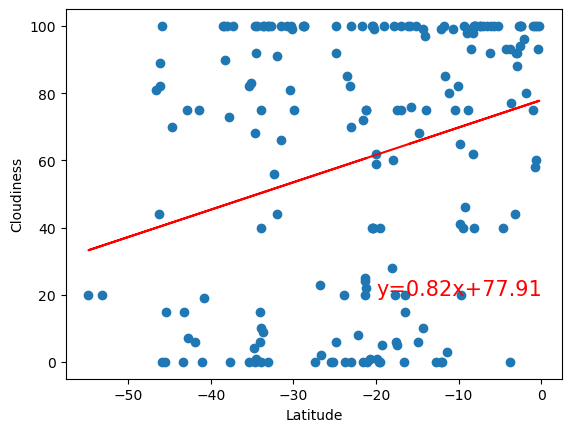

In [30]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.04168037431052235


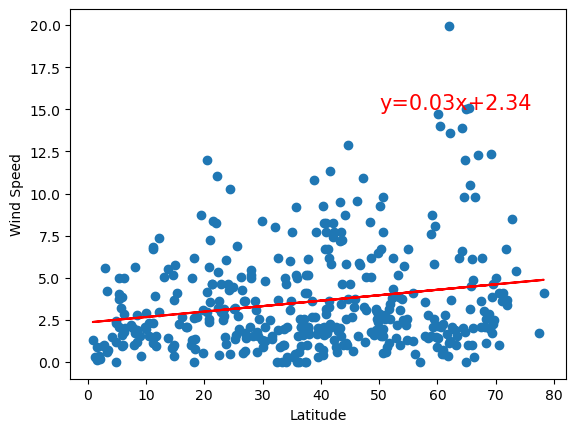

In [33]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue**2}")
plt.show()

The r-value is:0.1448506356814781


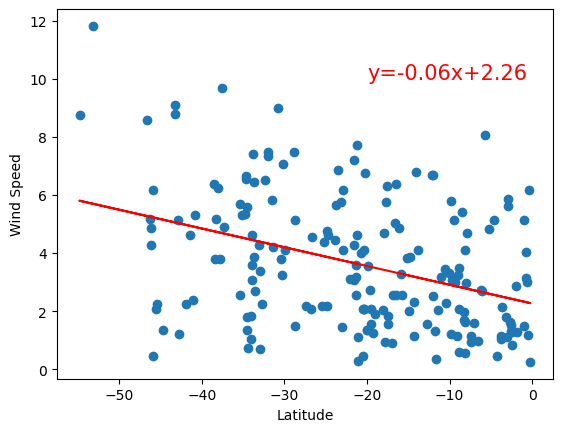

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20, 10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE